In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import LogNorm

In [ ]:
datos_ajuste = pd.read_csv("https://raw.githubusercontent.com/mariancarr/datosTpMN/main/ajuste.txt", header=None, sep=" ", names=["x", "y"])
datos_val = pd.read_csv("https://raw.githubusercontent.com/mariancarr/datosTpMN/main/validacion.txt", header=None, sep=" ", names=["x", "y"])


In [ ]:
# Ejercicio 2.a)
def cuadrados_minimos(X, y):
  U, s, V_t = np.linalg.svd(X, full_matrices = False)  #le pongo el false ese asi no me rellena la s con 0s. U y V son matrices, s es un array
  S_i = np.diag(1/s)
  beta = V_t.T @ S_i @ U.T @ y
  print("Tamaño U:",U.shape)
  print("Tamaño S:",s.shape)
  print("Tamaño V_t:",V_t.shape)
  print("Tamaño X:",X.shape)
  return beta

In [ ]:
X_ajuste = np.polynomial.legendre.legvander(datos_ajuste.x, 12)
beta = cuadrados_minimos(X_ajuste, datos_ajuste.y)

Tamaño U: (50, 13)
Tamaño S: (13,)
Tamaño V_t: (13, 13)
Tamaño X: (50, 13)


In [ ]:
# Ejercicio 2.b)
def cuadrados_minimos_reg(X, y, lam):
  U, S, V_t = np.linalg.svd(X, full_matrices = False)  #le pongo el false ese asi no me rellena la s con 0s. U y V son matrices, s es un array
  S = np.diag(S)
  I = np.eye(S.shape[0])
  reg =  S**2 + lam * I
  reg_i = np.diag(1/np.diag(reg))
  beta = V_t.T @ S @ reg_i @ U.T @ y
  return beta

In [ ]:
def yPredict(X, beta):
  y_pred = (beta.T @ X.T).T
  return y_pred

In [ ]:
def ECM(y_pred, y):
  ecm = np.sum((y_pred - y)**2)
  return ecm

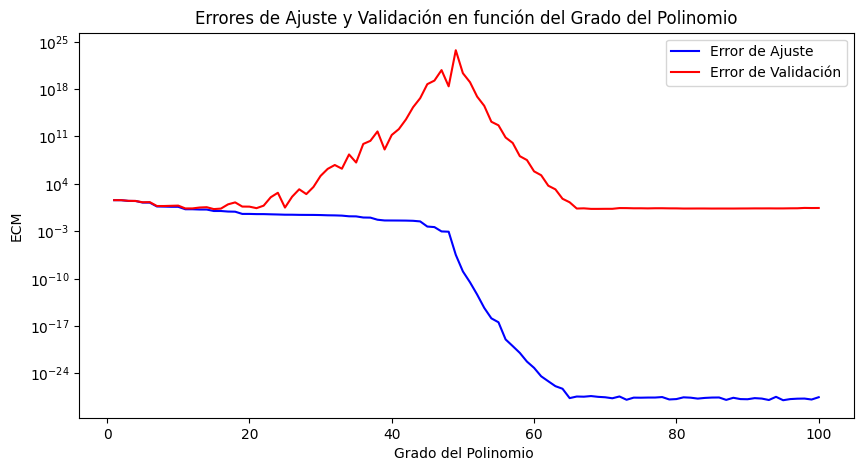

In [ ]:
# Ejercicio 3.a)
def ajuste_error(grados):

  resultados_val = []
  resultados_ajuste = []

  for grado in grados:
    X_val = np.polynomial.legendre.legvander(datos_val.x, grado)
    X_ajuste = np.polynomial.legendre.legvander(datos_ajuste.x, grado)
    beta = cuadrados_minimos(X_ajuste, datos_ajuste.y)
    y_ajuste_pred = yPredict(X_ajuste, beta)
    y_val_pred = yPredict(X_val, beta)
    error_val = ECM(datos_val.y, y_val_pred)
    error_ajuste = ECM(datos_ajuste.y, y_ajuste_pred)
    resultados_val.append((grado, error_val))
    resultados_ajuste.append((grado, error_ajuste))

  return resultados_ajuste, resultados_val

grados = np.arange(1, 2*datos_ajuste.shape[0]+1)
resultados_ajuste, resultados_val = ajuste_error(grados)
datos_results_ajuste = pd.DataFrame(resultados_ajuste, columns=["grado", "ecm"])
datos_results_val = pd.DataFrame(resultados_val, columns=["grado", "ecm"])

plt.figure(figsize=(10, 5))
plt.plot(datos_results_ajuste["grado"], datos_results_ajuste["ecm"], label="Error de Ajuste", color='b')
plt.plot(datos_results_val["grado"], datos_results_val["ecm"], label="Error de Validación", color='r')
plt.yscale("log")
plt.xlabel("Grado del Polinomio ")
plt.ylabel("ECM")
plt.title("Errores de Ajuste y Validación en función del Grado del Polinomio")
plt.legend()

plt.show()




In [ ]:
#Ejercicio 3.b)
def exploracion_hiperparametros(grados, lambdas):
  resultados_val = []
  resultados_ajuste = []

  for grado in grados:
    for l in lambdas:
        X_val = np.polynomial.legendre.legvander(datos_val.x, grado)
        X_ajuste = np.polynomial.legendre.legvander(datos_ajuste.x, grado)
        beta = cuadrados_minimos_reg(X_ajuste, datos_ajuste.y, l)
        y_ajuste_pred = yPredict(X_ajuste, beta)
        y_val_pred = yPredict(X_val, beta)
        error_val = ECM(datos_val.y, y_val_pred)
        error_ajuste = ECM(datos_ajuste.y, y_ajuste_pred)
        resultados_val.append((grado, l, error_val))
        resultados_ajuste.append((grado, l, error_ajuste))

  return resultados_ajuste, resultados_val

grados = np.arange(1, 50)
lambdas = np.logspace(-7, 2, 130, base=10)
resultados_ajuste, resultados_val = exploracion_hiperparametros(grados, lambdas)
datos_results_ajuste = pd.DataFrame(resultados_ajuste, columns=["grado", "lambda", "ecm"])
datos_results_val = pd.DataFrame(resultados_val, columns=["grado", "lambda", "ecm"])


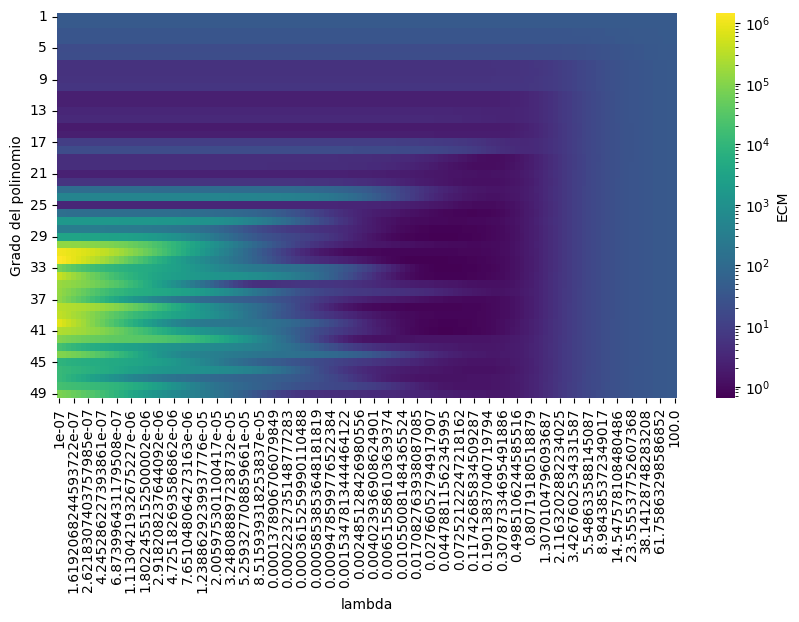

In [ ]:
df_results_pivot = datos_results_val.pivot(index="grado", columns="lambda", values="ecm")

plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df_results_pivot, cmap="viridis", yticklabels=4, linewidths=.0, norm=LogNorm(), cbar_kws={'label': 'ECM'})
plt.xlabel("lambda")
plt.ylabel("Grado del polinomio")
plt.yticks(rotation=0)

plt.savefig('1ra_busq_lambdas',bbox_inches='tight')
plt.show()

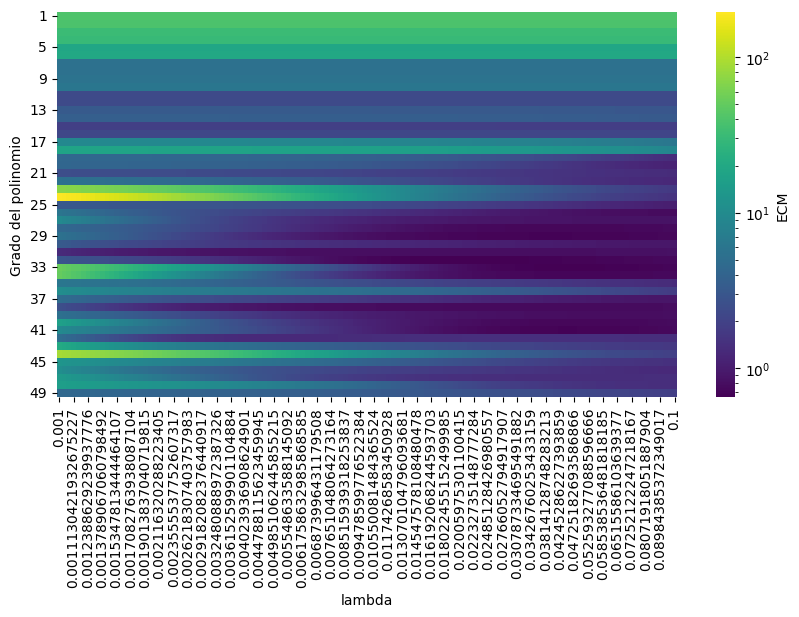

In [ ]:
grados = np.arange(1, 50)
lambdas = np.logspace(-3, -1, 130)
resultados_ajuste2, resultados_val2 = exploracion_hiperparametros(grados, lambdas)
datos_results_ajuste2 = pd.DataFrame(resultados_ajuste2, columns=["grado", "lambda", "ecm"])
datos_results_val2 = pd.DataFrame(resultados_val2, columns=["grado", "lambda", "ecm"])

df_results_pivot2 = datos_results_val2.pivot(index="grado", columns="lambda", values="ecm")

plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df_results_pivot2, cmap="viridis", yticklabels=4, linewidths=.0, norm=LogNorm(), cbar_kws={'label': 'ECM'})
plt.xlabel("lambda")
plt.ylabel("Grado del polinomio")
plt.yticks(rotation=0)

plt.savefig('2da_busq_lambdas',bbox_inches='tight')
plt.show()

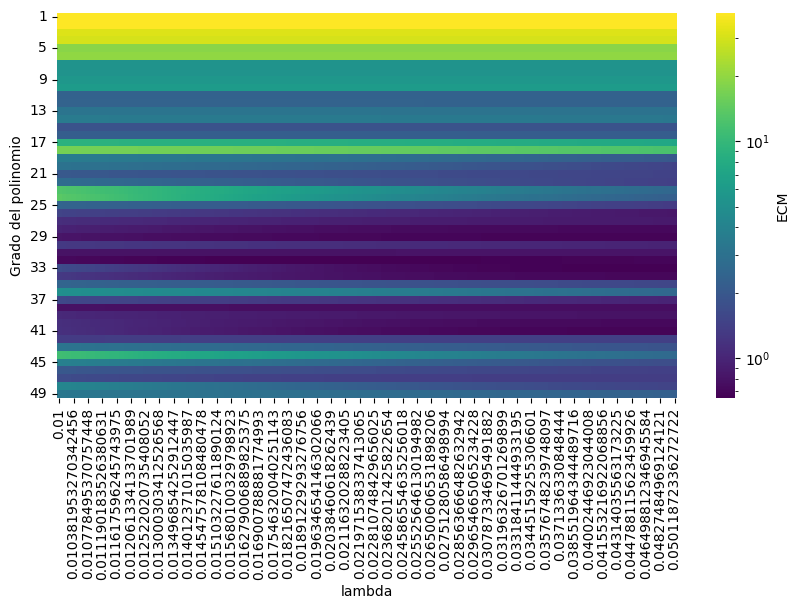

In [ ]:
grados = np.arange(1, 50)
lambdas = np.logspace(-2, -1.3, 130)
resultados_ajuste3, resultados_val3 = exploracion_hiperparametros(grados, lambdas)
datos_results_ajuste3 = pd.DataFrame(resultados_ajuste3, columns=["grado", "lambda", "ecm"])
datos_results_val3 = pd.DataFrame(resultados_val3, columns=["grado", "lambda", "ecm"])

df_results_pivot3 = datos_results_val3.pivot(index="grado", columns="lambda", values="ecm")

plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df_results_pivot3, cmap="viridis", yticklabels=4, linewidths=.0, norm=LogNorm(), cbar_kws={'label': 'ECM'})
plt.xlabel("lambda")
plt.ylabel("Grado del polinomio")
plt.yticks(rotation=0)

plt.savefig('3a_busq_lambdas',bbox_inches='tight')
plt.show()

In [ ]:
mejor_result_val = datos_results_val.sort_values(by="ecm").head(1)
mejor_grado = mejor_result_val.iloc[0]['grado']
mejor_lambda = mejor_result_val.iloc[0]['lambda']
mejor_ecm = mejor_result_val.iloc[0]['ecm']
print("Mejor lambda:", mejor_lambda, "\nMejor grado:", mejor_grado, "\nMejor error:", mejor_ecm)

peor_result_val = datos_results_val.sort_values(by="ecm", ascending=False).head(1)
peor_grado = peor_result_val.iloc[0]['grado']
peor_lambda = peor_result_val.iloc[0]['lambda']
peor_ecm = peor_result_val.iloc[0]['ecm']

print("Peor lambda:", peor_lambda ,"\nPeor grado:", peor_grado, "\nPeor error", peor_ecm )

Mejor lambda: 0.020059753011004128 
Mejor grado: 32.0 
Mejor error: 0.6528405490966551
Peor lambda: 1e-07 
Peor grado: 32.0 
Peor error 1474150.7479870094
